In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from datetime import datetime


In [211]:
df = pd.DataFrame()
for y in year:
    path = '../../perma_data/timeseries_derived_data_products/MH11_resistivity_rock_{}.csv'.format(y)
    df = pd.concat((df, pd.read_csv(path)), axis=0)

In [83]:
df2 = pd.DataFrame()
for y in year:
    path2 = '../../perma_data/timeseries_derived_data_products/MH25_vaisalawxt520prec_{}.csv'
    df2 = pd.concat((df2, pd.read_csv(path2)), axis=0)

,time,position [],rain_accumulation [mm],rain_duration [s],rain_intensity [mm/h],rain_peak_intensity [mm/h],hail_accumulation [hits/cm^2],hail_duration [s],hail_intensity [hits cm^-2 h^-1],hail_peak_intensity [hits cm^-2 h^-1]
0,2017-01-01T00:00:00Z,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01T01:00:00Z,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01T02:00:00Z,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01T03:00:00Z,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01T04:00:00Z,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df3 = {}
for y in year:
    path3 = '../../perma_data/timeseries_derived_data_products/MH25_vaisalawxt520windpth_2017.csv'
    df3 = pd.concat((df3, pd.read_csv(path3)), axis=0)

,time,position [],wind_direction_minimum [°],wind_direction_average [°],wind_direction_maximum [°],wind_speed_minimum [km/h],wind_speed_average [km/h],wind_speed_maximum [km/h],temp_air [°C],temp_internal [°C],relative_humidity [%RH],air_pressure [hPa]
0,2017-01-01T00:00:00Z,25.0,0.0,172.8710,357.0,0.0,6.2129,18.5,-6.8238,-2.2968,10.7935,669.1476
1,2017-01-01T01:00:00Z,25.0,0.0,210.1000,357.0,0.0,6.6033,17.3,-6.9920,-2.7367,12.3933,668.7360
2,2017-01-01T02:00:00Z,25.0,14.0,218.1613,359.0,0.9,7.8323,21.3,-7.0129,-3.0581,12.7032,668.2710
3,2017-01-01T03:00:00Z,25.0,30.0,220.2500,343.0,1.5,8.9094,24.3,-6.9313,-2.9562,12.9125,667.8094
4,2017-01-01T04:00:00Z,25.0,133.0,244.1290,342.0,2.0,10.2742,22.2,-6.9484,-3.2903,14.5000,667.3097


In [85]:
df.head()

,time,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],resistivity_35_85cm [Mohm],resistivity_10_85cm [Mohm],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C]
0,2017-01-01T00:00:00Z,10.0,2141.0,17.5556,43.1962,27.3694,2.5515,42.3615,40.5800,26.6627,24.3027,11.2267,7.0847,1.9563,-9.7372,1.0055,1.9538,-9.7387
1,2017-01-01T01:00:00Z,10.0,2141.0,17.3518,44.6352,27.2334,2.5086,42.4960,40.8015,26.5007,24.4067,11.3451,7.0938,1.9559,-9.7373,1.0055,1.9531,-9.7389
2,2017-01-01T02:00:00Z,10.0,2141.0,17.8145,46.1186,27.1687,2.4633,44.3185,41.0928,26.1960,24.5976,11.4621,7.1170,1.9557,-9.7378,1.0055,1.9531,-9.7386
3,2017-01-01T03:00:00Z,10.0,2141.0,18.6398,47.0515,27.1117,2.4222,46.1445,41.3910,25.8954,24.9310,11.5221,7.2701,1.9558,-9.7377,1.0054,1.9528,-9.7393
4,2017-01-01T04:00:00Z,10.0,2141.0,20.0013,47.4553,27.0140,2.3888,48.2208,41.5645,25.5277,25.4654,11.5436,7.5488,1.9556,-9.7378,1.0054,1.9531,-9.7394


In [86]:
def interpolate_to_timestamps(df, time_stamps):
    df = df.resample('4T').interpolate()
    ind = [df.index.get_loc(tim, method='nearest') for tim in time_stamps.time]
    return df.iloc[ind, :]

In [228]:
def extract_time_stamps(root_dirs):
    """
    input: [(year, root_dir), ...]
    """
    dfs = pd.DataFrame()
    for y, root_dir in enumerate(root_dirs)
        path_dict = {}
        for filename in glob.iglob(root_dir + '**/*/*', recursive=True):
            di, filname = os.path.split(filename)
            path_dict[filname] = extract_time(filname)
        df = pd.DataFrame({'time':list(path_dict.values()), 'filename': list(path_dict.keys())}, )
        df = df.set_index('time')
        dfs.concat((dfs, df), axis=0)
    return df

SyntaxError: invalid syntax (<ipython-input-228-16cbbbfe8ebd>, line 3)

In [223]:
def extract_time(filname):
    return datetime.strptime(filname, '%Y%m%d_%H%M%S.JPG')

In [ ]:
def extract_summer_days(time_stamps):
    start = pd.Timestamp(datetime.datetime(year=2000, month=1, day=1, hour=8)).time()
    end = pd.Timestamp(datetime.datetime(year=2000, month=1, day=1, hour=20)).time()

    time_stamps_day = time_stamps[np.logical_and(time_stamps['time'].dt.time >= start , 
                                                 time_stamps['time'].dt.time <= end)]
    
    june = pd.Timestamp(datetime.datetime(year=2000, month=5, day=1, hour=8)).month
    august = pd.Timestamp(datetime.datetime(year=2000, month=8, day=1, hour=8)).month

    time_stamps_summerday = time_stamps_day[np.logical_and(time_stamps['time'].dt.month < august , 
                                                           time_stamps['time'].dt.month >= june)]
    
    return time_stamps_summerday


In [227]:
#time_stamps = pd.read_pickle('pd_time_stamps.pkl')
#time_stamps.head()
time_stamps = extract_time_stamps('/Volumes/Bastian/Hackathon/Data/timelapse_images_fast/timelapse_images_fast/')
summer_days = extract_summer_days(time_stamps)

In [88]:
#summer_days = pd.read_pickle('pd_time_stamps_summerdays.pkl')

In [129]:
df = df.set_index(pd.DatetimeIndex(df.loc[:, 'time']))
df_interp = interpolate_to_timestamps(df, time_stamps)

In [90]:
df2 = df2.set_index(pd.DatetimeIndex(df2.loc[:, 'time']))
df2_interp = interpolate_to_timestamps(df2, time_stamps)

In [91]:
df3 = df3.set_index(pd.DatetimeIndex(df3.loc[:, 'time']))
df3_interp = interpolate_to_timestamps(df3, time_stamps)

In [160]:
dataset = pd.concat((df_interp, df2_interp, df3_interp), axis=1)
dataset['path'] = time_stamps.filename
dataset = dataset.rename(columns={'rain_intensity [mm/h]': 'rain_intensity'})

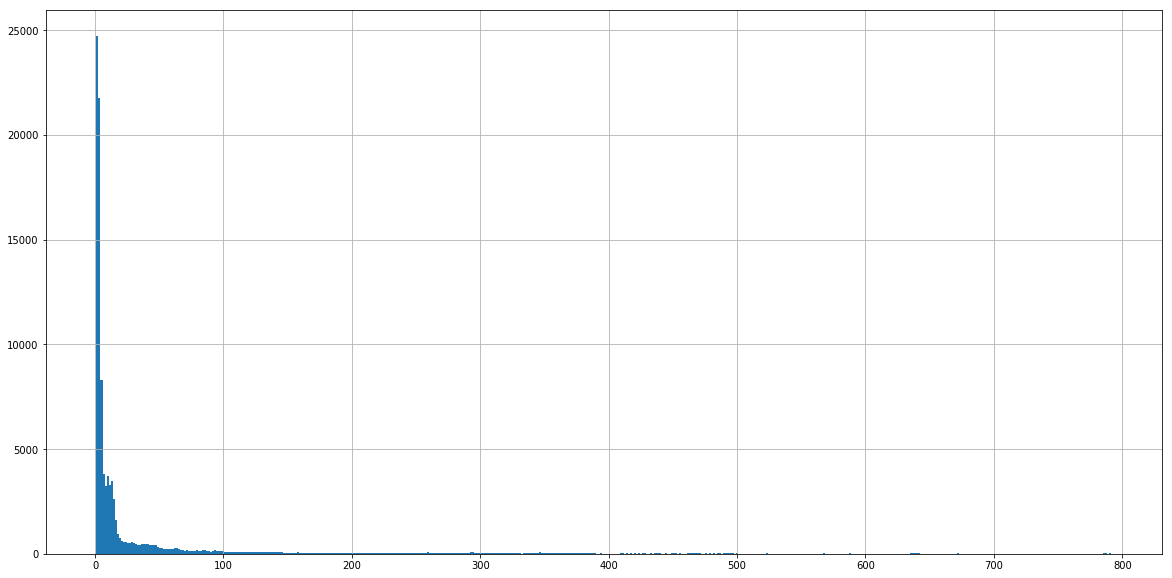

In [161]:
#dataset.loc[:, 'resistivity_10cm [Mohm]'].hist(bins=500, figsize=(20, 10))

[]

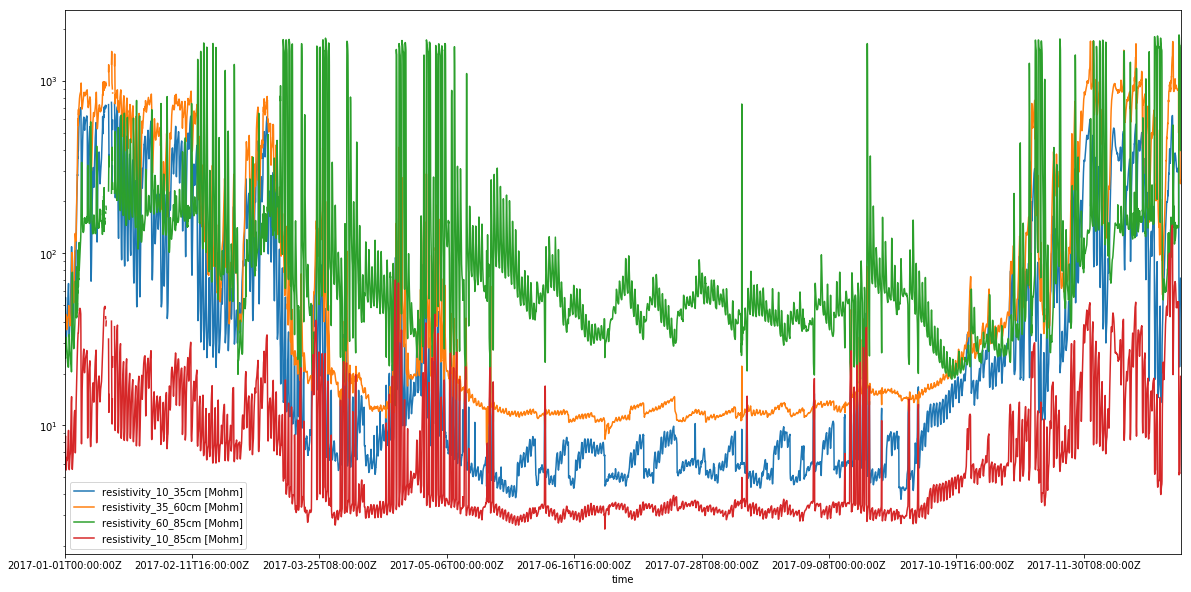

In [209]:
#df.plot('time', ['resistivity_10_35cm [Mohm]', 'resistivity_35_60cm [Mohm]', 'resistivity_60_85cm [Mohm]', 'resistivity_10_85cm [Mohm]'], figsize=(20,10))
#plt.semilogy()

In [201]:
dataset['label_thresh_rest10'] = dataset.loc[:, 'resistivity_10cm [Mohm]'] > 50
dataset['rain_label'] = dataset.loc[:, 'rain_intensity'] > 1

In [202]:
dataset.iloc[summer_days.index].query('rain_label == False').loc[:, ['path', 'label_thresh_rest10']].to_csv('labels_rain_resist.csv', header=False)
dataset.iloc[summer_days.index].loc[:, ['path', 'label_thresh_rest10']].to_csv('labels.csv', header=False)

In [203]:
dataset.head()

,time,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],...,wind_speed_minimum [km/h],wind_speed_average [km/h],wind_speed_maximum [km/h],temp_air [°C],temp_internal [°C],relative_humidity [%RH],air_pressure [hPa],path,label_thresh_rest10,rain_label
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 07:00:00+00:00,2017-01-01T07:00:00Z,10.0,2141.0,26.206800,47.014600,27.249700,2.349200,55.333700,41.698400,24.495200,...,0.600000,7.877400,23.600000,-7.377400,-3.1355,14.132300,666.400000,NaN,True,False
2017-01-01 07:04:00+00:00,NaN,10.0,2141.0,25.734267,47.096993,27.350253,2.354107,54.779747,41.763993,24.618213,...,0.586667,7.687573,22.893333,-7.311127,-3.0218,14.091033,666.394447,NaN,True,False
2017-01-01 07:08:00+00:00,NaN,10.0,2141.0,25.261733,47.179387,27.450807,2.359013,54.225793,41.829587,24.741227,...,0.573333,7.497747,22.186667,-7.244853,-2.9081,14.049767,666.388893,NaN,True,False
2017-01-01 07:12:00+00:00,NaN,10.0,2141.0,24.789200,47.261780,27.551360,2.363920,53.671840,41.895180,24.864240,...,0.560000,7.307920,21.480000,-7.178580,-2.7944,14.008500,666.383340,NaN,True,False
2017-01-01 07:16:00+00:00,NaN,10.0,2141.0,24.316667,47.344173,27.651913,2.368827,53.117887,41.960773,24.987253,...,0.546667,7.118093,20.773333,-7.112307,-2.6807,13.967233,666.377787,NaN,True,False


In [204]:
pd.crosstab(dataset.iloc[summer_days.index, :].loc[:, 'rain_label'], dataset.iloc[summer_days.index, :].loc[:, 'label_thresh_rest10'])

label_thresh_rest10,True
rain_label,
False,13230
True,976


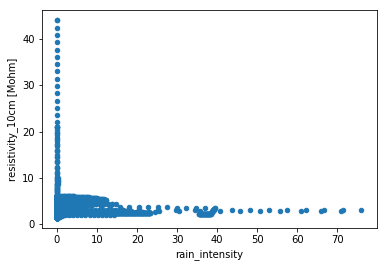

In [184]:
dataset.iloc[summer_days.index].plot.scatter('rain_intensity', 'resistivity_10cm [Mohm]')

In [99]:
len(dataset.iloc[summer_days.index].query('rain_label == False').loc[:, ['path', 'label_thresh_rest10']].query('label_thresh_rest10 == True'))

0